# BellaBeat Case Study: 

### We have been working on how best to market our Smart Device prodcuts to new markets and to expand our current market share. As part of this study, we have analyzed smart device data. 

In [2]:
library(tidyverse)
library(stringr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(scales)
library(tidyr)
library(gghighlight)

list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




[1] "fitbit"

# Prepare Data: 
### The open-sourced dataset contains personal fitness tracker data from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. We imported the data into specific dataframes using the read.csv function and then created a different dataset with the names of each individual data frame. 

In [3]:
data <- list.files("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16" , pattern = "csv" , full.names = TRUE , recursive = FALSE) 
sets <- lapply(data , function(x) read.csv(x))
names <- data %>% str_extract('(?<=\\d/).*(?=\\.)')

### This is a print out of all the different data frames that are in this data set. 

In [4]:
print("Data Frames Created:") 
        for (x in 1:length(data)){ 
            assign(names[x], sets[[x]]) 
            print(names[x]) 
        } 

[1] "Data Frames Created:"
[1] "dailyActivity_merged"
[1] "dailyCalories_merged"
[1] "dailyIntensities_merged"
[1] "dailySteps_merged"
[1] "heartrate_seconds_merged"
[1] "hourlyCalories_merged"
[1] "hourlyIntensities_merged"
[1] "hourlySteps_merged"
[1] "minuteCaloriesNarrow_merged"
[1] "minuteCaloriesWide_merged"
[1] "minuteIntensitiesNarrow_merged"
[1] "minuteIntensitiesWide_merged"
[1] "minuteMETsNarrow_merged"
[1] "minuteSleep_merged"
[1] "minuteStepsNarrow_merged"
[1] "minuteStepsWide_merged"
[1] "sleepDay_merged"
[1] "weightLogInfo_merged"


### The next step was to narrow in on each data frame and see how they are laid out and what sort of data they contain. This is a small print out of the Intensity of Exercise for each hour.

In [5]:
View(hourlyIntensities_merged)

Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


# Processing Data: 
### We decided to look into this hourly intensities data frame. We wanted to see what times have the greatest average intensities in the whole dataset.

In [6]:
hourlyIntensities_merged$ActivityHour <- mdy_hms(hourlyIntensities_merged$ActivityHour)
cleanIntensities <- separate(hourlyIntensities_merged , 
         ActivityHour , 
         into = c("Date" , "Time") , 
         sep = " " , 
         extra = "merge"
        )
cleanIntensities %>%
group_by(Time) %>% 
summarise(avg = mean(TotalIntensity))%>%
{. ->> cleanIntensitiesTime } 
View(cleanIntensitiesTime)

Time,avg
<chr>,<dbl>
00:00:00,2.1295503
01:00:00,1.4190782
02:00:00,1.0439443
03:00:00,0.4437299
04:00:00,0.6330472
05:00:00,4.9506438
06:00:00,7.7712137
07:00:00,10.7336198
08:00:00,14.6680988


# Sharing Data: 

### We decided to plot the average intensities per hour on a chart to see which times would be the best to have advertising up and seen. 

label_key: Time



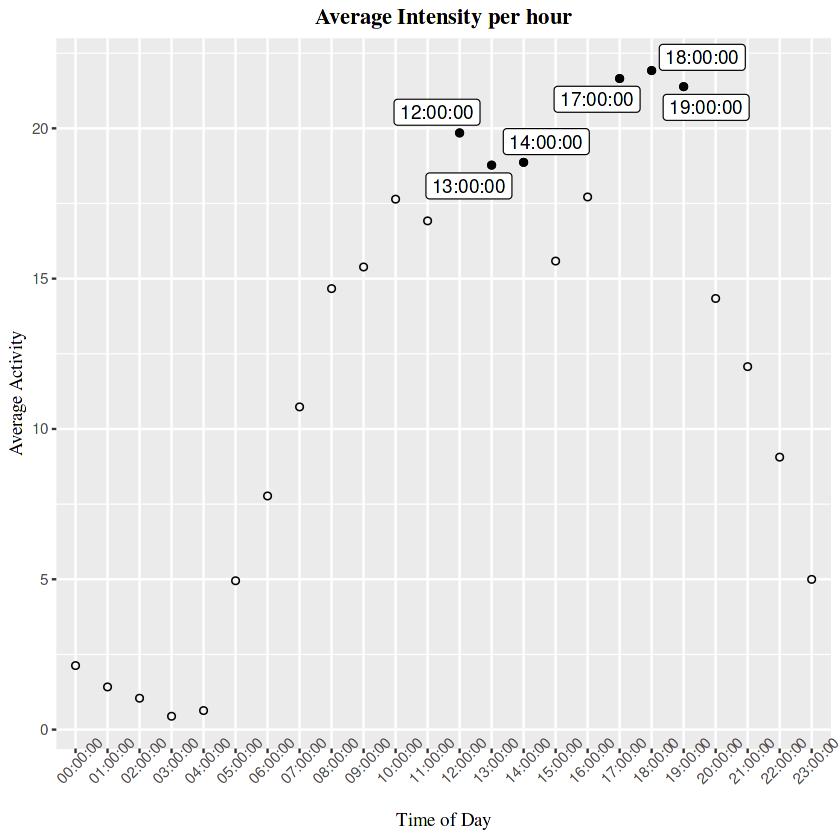

In [21]:
ggplot(data = cleanIntensitiesTime) +
    geom_point(mapping = aes(
    x = Time,
    y = avg)) +
    theme(axis.text.x = element_text(angle = 45)) +
    gghighlight(max(avg) >18, 
            keep_scales = TRUE,
           unhighlighted_params = list(alpha= NULL, colour = NULL, shape = 1)
           ) + 
    labs(title ="Average Intensity per hour" , x = "Time of Day" , y = "Average Activity") +
theme(plot.title = element_text(family = "Times New Roman", 
                                hjust = 0.5, 
                                face ="bold"),
     axis.title = element_text(family = "Times New Roman"))


# Act: 
### Over the course of our analysis, we determined that the most effective time for advertising our BellaBeat products would be when potential customers are already working out, whether that be video ads in gyms or adds on podcast apps. This way our advertising dollars are being spent when potential customers are thinking about exercise. For this purpose we analyzed when on average are customers most active and doing the most strenuous activity. Our analysis showed that the most active hours are in the afternoon from 12:00 until about 19:00 in the evening. These would be the most effective hours for advertising to be placed. 